In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re
from matplotlib.lines import Line2D

# Process data

In [3]:
# Load data
data = pd.read_csv('outputs/result/test_results_100_10.csv')

df = pd.DataFrame(data, columns=["Filename", "Label", "Prediction"])
df

,Filename,Label,Prediction
0,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2
1,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2
2,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2
3,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2
4,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,5
...,...,...,...
21536,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0
21537,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0
21538,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0
21539,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0


In [4]:
# Extract coordinates
def extract_coords(filename):
    match = re.search(r"_(-?\d+\.\d+)_(-?\d+\.\d+)", filename)
    if match:
        lon = float(match.group(1))
        lat = float(match.group(2))
        return pd.Series([lat, lon])
    else:
        return pd.Series([None, None])

df[['lat', 'lon']] = df['Filename'].apply(extract_coords)
df

,Filename,Label,Prediction,lat,lon
0,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2,42.597627,-107.454952
1,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2,42.234364,-109.777006
2,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2,40.619875,-119.352264
3,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,2,42.931418,-91.933984
4,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,2,5,42.599908,-106.418925
...,...,...,...,...,...
21536,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0,40.915126,-72.605113
21537,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0,43.082149,-98.613877
21538,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0,40.944220,-73.164955
21539,/kaggle/input/firerisk/firerisk2434/FireRisk/v...,0,0,42.805506,-97.192010


In [5]:
# Determine correct vs incorrect
df['Correct'] = df['Label'] == df['Prediction']

# Separate correct/incorrect for different colors
correct = df[df['Correct']]
incorrect = df[~df['Correct']]

# Map

In [57]:
# Create custom legend handles
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct',
           markerfacecolor='black', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Incorrect',
           markerfacecolor='red', markersize=6)
]

## Full Map

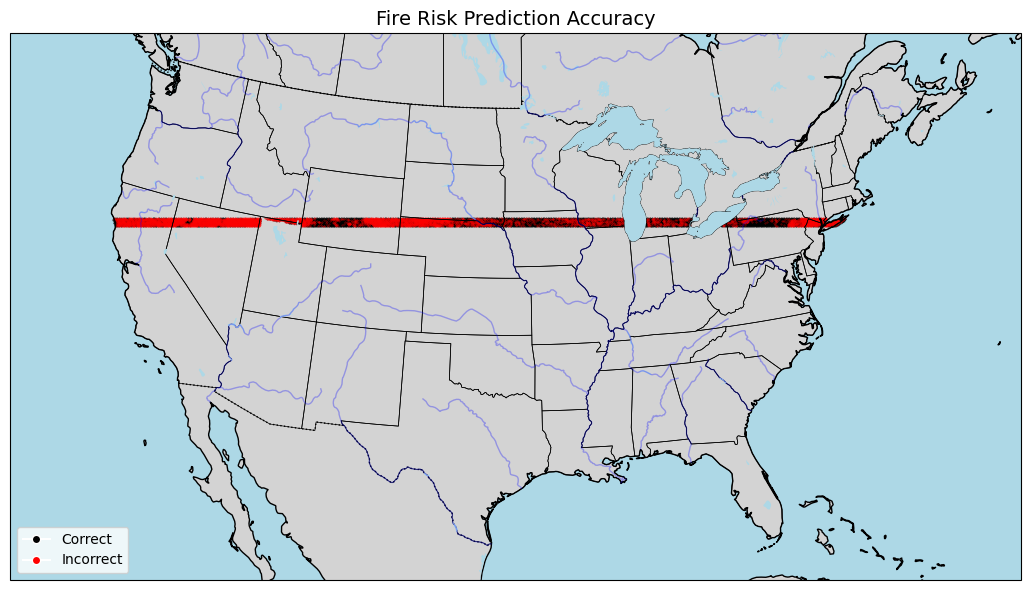

In [74]:
# Mapping
fig = plt.figure(figsize=(14, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=23,
    standard_parallels=(29.5, 45.5),
    false_easting=0,
    false_northing=0,
))

# Set extent to continental US
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.3)

# Plot correct predictions
ax.scatter(correct['lon'], correct['lat'], color='black', s=0.1, label='Correct', alpha=0.6, transform=ccrs.PlateCarree())

# Plot incorrect predictions
ax.scatter(incorrect['lon'], incorrect['lat'], color='red', s=0.1, label='Incorrect', alpha=0.6, transform=ccrs.PlateCarree())

# Add legend and title
plt.legend(handles=legend_elements, loc='lower left')
plt.title("Fire Risk Prediction Accuracy", fontsize=14)

# Save or show
plt.tight_layout()
# plt.savefig("fire_risk_prediction_map.png", dpi=300)
plt.show()

## Cropped Area

In [9]:
# Calculate extent from your data
min_lon, max_lon = df['lon'].min(), df['lon'].max()
min_lat, max_lat = df['lat'].min(), df['lat'].max()
padding = 1.0  # degrees

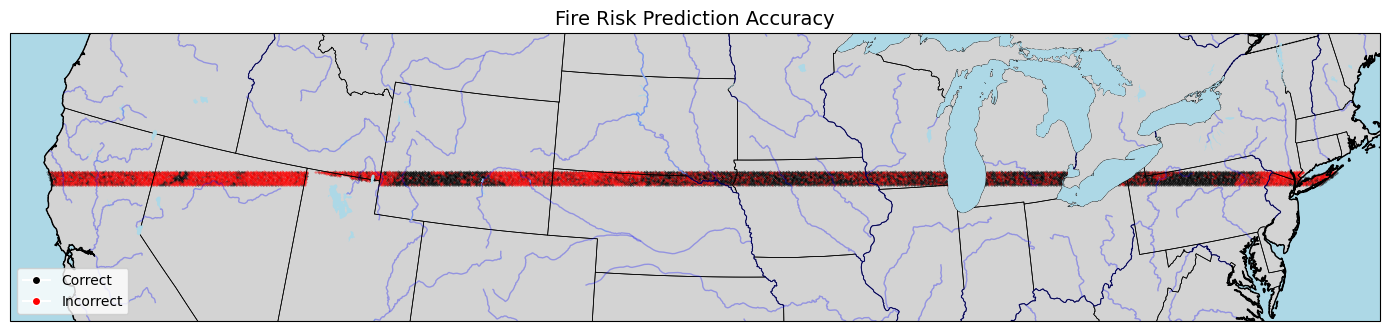

In [60]:
# Mapping
fig = plt.figure(figsize=(14, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=23,
    standard_parallels=(29.5, 45.5),
    false_easting=0,
    false_northing=0,
))

ax.set_extent([min_lon - padding, max_lon + padding, min_lat - padding, max_lat + padding], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.3)

# Plot correct predictions
ax.scatter(correct['lon'], correct['lat'], color='black', s=0.1, label='Correct', alpha=0.6, transform=ccrs.PlateCarree())

# Plot incorrect predictions
ax.scatter(incorrect['lon'], incorrect['lat'], color='red', s=0.1, label='Incorrect', alpha=0.6, transform=ccrs.PlateCarree())

# Add legend and title
plt.legend(handles=legend_elements, loc='lower left')
plt.title("Fire Risk Prediction Accuracy", fontsize=14)

# Save or show
plt.tight_layout()
# plt.savefig("fire_risk_prediction_map_crop.png", dpi=300)
plt.show()

## True Labels

In [13]:
label_colors = {
    0: '#1f77b4',      # Water
    1: '#8B4513',      # Non-burnable
    2: '#2ca02c',      # Very Low
    3: '#98df8a',      # Low
    4: '#ffed6f',      # Moderate
    5: '#ff7f0e',      # High
    6: '#d62728',      # Very High
}

In [15]:
legend_elements_class = [
    Line2D([0], [0], marker='o', color='w', label='0 Water', markerfacecolor=label_colors[0], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='1 Non-burnable', markerfacecolor=label_colors[1], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='2 Very Low', markerfacecolor=label_colors[2], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='3 Low', markerfacecolor=label_colors[3], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='4 Moderate', markerfacecolor=label_colors[4], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='5 High', markerfacecolor=label_colors[5], markersize=6),
    Line2D([0], [0], marker='o', color='w', label='6 Very High', markerfacecolor=label_colors[6], markersize=6),
]

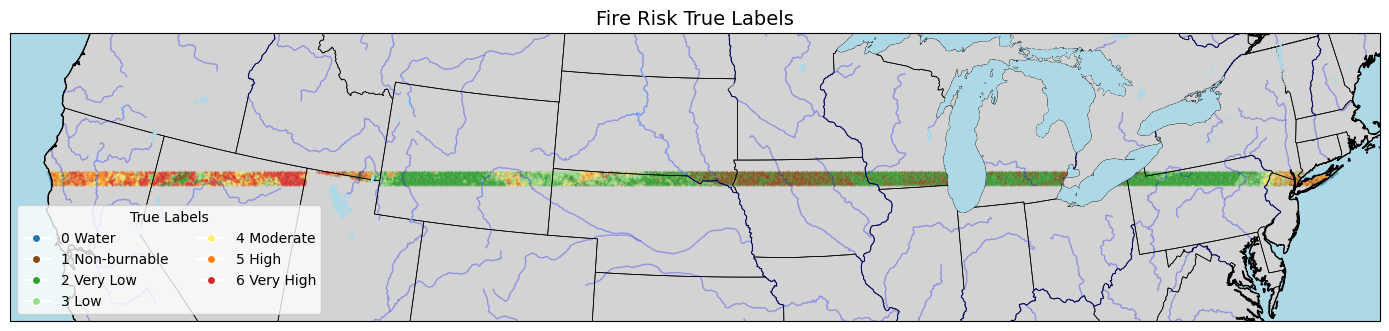

In [17]:
# Mapping
fig = plt.figure(figsize=(14, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=23,
    standard_parallels=(29.5, 45.5),
    false_easting=0,
    false_northing=0,
))

ax.set_extent([min_lon - padding, max_lon + padding, min_lat - padding, max_lat + padding], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.3)

# Plot each class label separately with its color
for label, color in label_colors.items():
    subset = df[df['Label'] == label]
    ax.scatter(subset['lon'], subset['lat'], s=0.1, label=f'Class {label}',
               color=color, alpha=0.6, transform=ccrs.PlateCarree())

# Add legend and title
plt.legend(handles=legend_elements_class, loc='lower left', title="True Labels", ncol=2)
plt.title("Fire Risk True Labels", fontsize=14)

# Save or show
plt.tight_layout()
# plt.savefig("fire_risk_prediction_map_true.png", dpi=300)
plt.show()